<a href="https://colab.research.google.com/github/WENKAITAN/CMP414765Spring2022/blob/main/MidtermSpring2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMP 414/765 Mid-Term Project 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/450px-RMS_Titanic_3.jpg" width="300">

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although where was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

For the mid-term project, we will work with the [Titanic dataset](https://www.kaggle.com/c/titanic) on Kaggle.com. In this project, you will get to apply machine learning tools to analyze the passenger information from the training set, and analyze what factors may affect a passenger's chance for survival. **You are expected to submit a complete Jupyter notebook with python code (including detailed comments), numerical results, and graphs (with proper labeling) to Blackboard.** The submission deadline is **Sunday, April 24th**.


# Stage I: Data Exploration


(1) Download the training data from https://www.kaggle.com/c/titanic/data as a CSV file.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

(2) Load the training dataset as a Pandas DataFrame. 

In [2]:
data = pd.read_csv("./sample_data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(3) Obtain basic information of variables. For each variable, find out:
1. What does this variable represent
2. The meaning of values
3. Numerical summary
4. Graphical distributions of values


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(4) Data Cleaning

Discard all passengers with incomplete information may significantly reduce the number of data example. Please handle the missing value problem in the following way:
1. Remove all columns that contain more than 5% missing values.
2. After Step 1, remove any row that has missing values.



In [6]:
data.isna().sum() / len(data) *100
# we find out columns Age and Cabin have more 5% missing values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
data = data.drop(['Age', 'Cabin'], axis=1)
data.isna().sum() / len(data) *100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [8]:
data = data.dropna(axis=0)
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 76.4+ KB


(5) Prediction Power
A good model should only include variables that are indeed related to the task. Use correlation coefficients and scatter plots to decide which variables have strong relationship to passengers’ survival, and which don’t. 


In [10]:
df=pd.get_dummies(data, columns=["Sex", "Embarked"])
df.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,0,1,0,0,1


In [11]:
df.corr()
#key_features are all the features except for PassengerId, SibSp, Parch, and Embarked_Q

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005028,-0.035330,-0.057686,-0.001657,0.012703,-0.043136,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
SibSp,-0.057686,-0.034040,0.081656,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
Sex_female,-0.043136,0.541585,-0.127741,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
Sex_male,0.043136,-0.541585,0.127741,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
Embarked_C,-0.001208,0.169966,-0.245733,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613
Embarked_Q,-0.033694,0.004536,0.220558,-0.026692,-0.081585,-0.116684,0.075217,-0.075217,-0.148646,1.000000,-0.499261


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad2900acd0>,
      dtype=object)

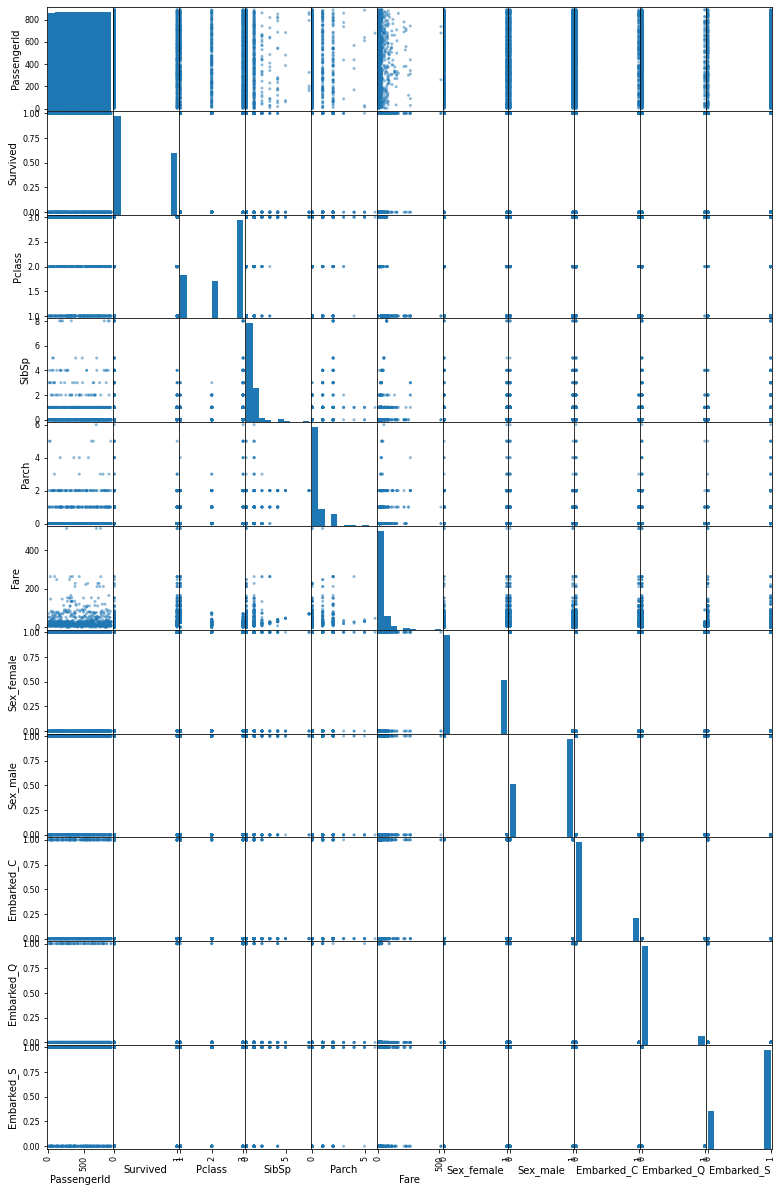

In [12]:
pd.plotting.scatter_matrix(df, figsize=(13, 21))

(6) (optional) You may think that the name feature is irrelevant. However, a closer look at the names will show that some passengers have rare titles such as Dr., Mme, or Master., which indicates their high social status. Please create a column to indicate whether a passenger has a rare title.

In [13]:
def nameHasRareStatus(name):
  for title in status_titles:
    if title in name.split():
      return True
  return False

In [14]:
status_titles = ["Dr.", "Mme", "Master", "Mr."]

name = data.loc[0,'Name']

for idx in df.index:
  name = data.loc[idx,'Name']
  if nameHasRareStatus(name):
    df.loc[idx, 'has_rare_status'] = True
  else:
    df.loc[idx, 'has_rare_status'] = False

df.head()
df['has_rare_status'] = df['has_rare_status'].astype(int)
df['has_rare_status'].value_counts()


1    524
0    365
Name: has_rare_status, dtype: int64

In [15]:
df = pd.get_dummies(df,columns=["has_rare_status"])
df.corr()


,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,has_rare_status_0,has_rare_status_1
PassengerId,1.000000,-0.005028,-0.035330,-0.057686,-0.001657,0.012703,-0.043136,0.043136,-0.001208,-0.033694,0.022269,-0.045339,0.045339
Survived,-0.005028,1.000000,-0.335549,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777,0.547691,-0.547691
Pclass,-0.035330,-0.335549,1.000000,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466,-0.119859,0.119859
SibSp,-0.057686,-0.034040,0.081656,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438,0.252216,-0.252216
Parch,-0.001657,0.083151,0.016824,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512,0.344290,-0.344290
Fare,0.012703,0.255290,-0.548193,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758,0.176695,-0.176695
Sex_female,-0.043136,0.541585,-0.127741,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405,0.876275,-0.876275
Sex_male,0.043136,-0.541585,0.127741,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405,-0.876275,0.876275
Embarked_C,-0.001208,0.169966,-0.245733,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613,0.070227,-0.070227
Embarked_Q,-0.033694,0.004536,0.220558,-0.026692,-0.081585,-0.116684,0.075217,-0.075217,-0.148646,1.000000,-0.499261,0.076303,-0.076303


In [16]:
# now we have extra key features
key_features = ["Pclass",	"Fare",	"Sex_female",	"Sex_male",	"Embarked_C",	"Embarked_S",	"has_rare_status_0",	"has_rare_status_1"]

## Stage II: Model Construction

(1) Converting Categorical Features

1. Sex in the original dataset is categorial, and thus cannot be directly fed into Machine Learning models. Please convert the categories into 0’s and 1’s.
2. Embarked is also categorical. However, it is not ideal to simply convert the three categories into 0, 1, and 2, since it creates a bias by imposing an order to the values. Instead, we can add an indicator variable (also known as a dummy variable) for each category separately. Please replace the Embarked variable with three variables – Embarked_S, Embarked_C, and Embarked_Q – to indicate the place a passenger boarded the ship. For example, if a passenger boarded from Southamptons, Embarked_S should be set to 1, and Embarked_C and Embarked_Q should be zero. ([pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) can help you with this)


In [17]:
# Already done this this before.

(2) Feature Scaling

Machine learning models usually work best on datasets whose variables have similar ranges. Please scale each variable so that it has zero mean and unit variance (sklearn.preprocessing.StandardScaler() can help you with this).

In [18]:
df = df[key_features]
df.head()


,Pclass,Fare,Sex_female,Sex_male,Embarked_C,Embarked_S,has_rare_status_0,has_rare_status_1
0,3,7.2500,0,1,0,1,0,1
1,1,71.2833,1,0,1,0,1,0
2,3,7.9250,1,0,0,1,1,0
3,1,53.1000,1,0,0,1,1,0
4,3,8.0500,0,1,0,1,0,1


In [19]:
scaler = StandardScaler()
scaler = scaler.fit(df)
scaler

StandardScaler()

In [20]:
X_scaled = scaler.transform(df)
X_scaled

array([[ 0.82520863, -0.50023975, -0.73534203, ...,  0.61679395,
        -0.83460463,  0.83460463],
       [-1.57221121,  0.78894661,  1.35991138, ..., -1.62128697,
         1.19817212, -1.19817212],
       [ 0.82520863, -0.48664993,  1.35991138, ...,  0.61679395,
         1.19817212, -1.19817212],
       ...,
       [ 0.82520863, -0.17408416,  1.35991138, ...,  0.61679395,
         1.19817212, -1.19817212],
       [-1.57221121, -0.0422126 , -0.73534203, ..., -1.62128697,
        -0.83460463,  0.83460463],
       [ 0.82520863, -0.49017322, -0.73534203, ..., -1.62128697,
        -0.83460463,  0.83460463]])

In [21]:
X_scaled.mean(axis=0)

array([-2.43774504e-16,  1.39870617e-16, -4.39593369e-17,  4.39593369e-17,
        6.99353086e-18, -7.49306878e-17, -3.99630335e-17,  3.99630335e-17])

In [22]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

(3) Extract Validation set

Because the test dataset from the website has no information on survival, it cannot be used to evaluate the performance of the model. As a result, we need to further split the data in train.csv into training set (80%) and validation set (20%). We will use training set to build the models, and use validation set to evaluate them. (`sklearn.model_selection.train_test_split()` can help you with this)

(4) (Optional: Feature Engineering)

Previously we noticed that some passengers’ names have rare titles, which may indicate their unusual social status. Extracting a new feature from existing data is called feature engineering. Another interesting thing you may observed is that some passenger got on board for free! This could also be a potential indicator of the social status of the passenger. Please create an indicator variable on whether a person paid for the ticket.

In [23]:
df["fairIsPaid"] = df['Fare'] != 0
df["fairIsPaid"] = df["fairIsPaid"].astype(int)
df.head()

,Pclass,Fare,Sex_female,Sex_male,Embarked_C,Embarked_S,has_rare_status_0,has_rare_status_1,fairIsPaid
0,3,7.2500,0,1,0,1,0,1,1
1,1,71.2833,1,0,1,0,1,0,1
2,3,7.9250,1,0,0,1,1,0,1
3,1,53.1000,1,0,0,1,1,0,1
4,3,8.0500,0,1,0,1,0,1,1


In [24]:
x = df
y = data[["Survived"]]
print(x.head())
y.head()

   Pclass     Fare  Sex_female  Sex_male  Embarked_C  Embarked_S  \
0       3   7.2500           0         1           0           1   
1       1  71.2833           1         0           1           0   
2       3   7.9250           1         0           0           1   
3       1  53.1000           1         0           0           1   
4       3   8.0500           0         1           0           1   

   has_rare_status_0  has_rare_status_1  fairIsPaid  
0                  0                  1           1  
1                  1                  0           1  
2                  1                  0           1  
3                  1                  0           1  
4                  0                  1           1  


,Survived
0,0
1,1
2,1
3,1
4,0


In [25]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2)

print(x_train.head())
y_train.head()

     Pclass  Fare  Sex_female  Sex_male  Embarked_C  Embarked_S  \
106       3  7.65           1         0           0           1   
494       3  8.05           0         1           0           1   
428       3  7.75           0         1           0           0   
37        3  8.05           0         1           0           1   
784       3  7.05           0         1           0           1   

     has_rare_status_0  has_rare_status_1  fairIsPaid  
106                  1                  0           1  
494                  0                  1           1  
428                  0                  1           1  
37                   0                  1           1  
784                  0                  1           1  


,Survived
106,1
494,0
428,0
37,0
784,0


(5) Building Models

So far, we have learned five models: linear regression, polynomial regression, logistic regression, k-nearest neighbors method, and linear support vector machine. Choose at least two models that are suitable for this problem and use corresponding sklearn classes to fit the data. Note that each model class has several parameters, you are welcome to change the default parameter values and try to improve the performance of the model.


In [26]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [27]:
y_pred = knn5.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[101,   4],
       [ 29,  44]])

In [28]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(accuracy, precision, recall, f1)

0.8146067415730337 0.9166666666666666 0.6027397260273972 0.7272727272727272


In [29]:
# Perform 5-fold cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(knn5, x_test, y_test, cv=5) # accuracy is returned by default

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

array([0.88888889, 0.77777778, 0.72222222, 0.74285714, 0.68571429])

In [30]:
print(cross_val_score(knn5, x_test, y_test, cv=5, scoring="precision"))

[0.86666667 0.76923077 0.72727273 0.66666667 0.57894737]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [31]:
print(cross_val_score(knn5, x_test, y_test, cv=5, scoring="recall"))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.86666667 0.66666667 0.53333333 0.71428571 0.78571429]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
# Logistic Regression

model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [33]:
y_pred = model.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[97,  8],
       [30, 43]])

In [34]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(accuracy, precision, recall, f1)

0.7865168539325843 0.8431372549019608 0.589041095890411 0.6935483870967742


In [35]:
cross_val_score(model, x_test, y_test, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

array([0.80555556, 0.80555556, 0.83333333, 0.77142857, 0.77142857])

In [36]:
cross_val_score(model, x_test, y_test, cv=5, scoring="precision")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

array([0.9       , 0.75      , 1.        , 0.75      , 0.66666667])

In [37]:
cross_val_score(knn5, x_test, y_test, cv=5, scoring="recall")

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

array([0.86666667, 0.66666667, 0.53333333, 0.71428571, 0.78571429])

## Stage III: Model Selection and Interpretation

(1) Model Selection. 

For each model you have trained, perform the following evaluations on the validation set:
1. cross validation
2. confusion matrix
3. precision, and recall 

What is the best model?

In [37]:
LogisticRegression is better model

(2) Model Interpretation.

Based on the model that you have selected, can you identify a few key variables that are important in predicting the survival of the passengers? Try to find out which characteristics can improve passengers’ chance of survival.


(3) (optional) Submit Results to Kaggle.com
Make predictions on the test set, submit your results to Kaggle.com. 